In [2]:
# 載入必要的MODULE
import requests, json, datetime, jieba
import pandas as pd
from wordcloud import WordCloud

In [3]:
!pip install jieba

  Stored in directory: C:\Users\Shane\AppData\Local\pip\Cache\wheels\af\e4\8e\5fdd61a6b45032936b8f9ae2044ab33e61577950ce8e0dec29
Successfully built jieba


In [5]:
!pip install wordcloud

In [3]:

# 選新聞
# 抓API數量並且標示500筆
r = requests.get('https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNewsByBucketGroup&groupid=Game_tw&len=500')
# r = requests.get('https://www.cupoy.com/MixNewsAction.do?op=chkExtendFlagItems')
# r = requests.get('https://www.cupoy.com/MixNewsAction.do?op=chkExtendFlagItems')

# 把DATA轉換成JSON格式
data = json.loads(r.text)

data

{'items': [{'itemuid': '68747470733A2F2F6368696E6573652E656E6761646765742E636F6D2F617375732D726F672D73776966742D706733327571782D73747269782D7867343375712D74772D3130343034393733362E68746D6C',
   'newsid': '0000017AE267276868747470733A2F2F6368696E6573652E656E6761646765742E636F6D2F617375732D726F672D73776966742D706733327571782D73747269782D7867343375712D74772D3130343034393733362E68746D6C',
   'itemsrctype': 2,
   'ctype': 5,
   'title': 'ROG 推出兩款大尺寸旗艦電競螢幕',
   'description': '華碩旗下的電競品牌 ROG 今天發表了兩款旗艦電競螢幕，分別為 32吋、採用 Mini LED 的「ROG Swift PG32UQX」與 43吋 HDMI 2.1介面的「ROG Strix XG43UQ」。',
   'thumbimgurl': 'https://s.yimg.com/os/creatr-uploaded-images/2021-07/cad4c240-edfa-11eb-bddc-c20d6f14e843',
   'linkurl': 'https://chinese.engadget.com/asus-rog-swift-pg32uqx-strix-xg43uq-tw-104049736.html',
   'nationID': 'TW',
   'publishtime': 1627296049000,
   'bucketids': ['3c_tw', 'ElectronicSports_tw'],
   'bucketgrpids': ['3CExpert_tw', 'GamePlayer_tw', 'Game_tw', 'tech_tw'],
   'metrics': {'socialScore

In [5]:

# 提取每一筆ITEM資料的不同內容:
# articles_id = []
articles_title = []
articles_url = []
count = 0

#把連結和標題送進陣列

for item in data['items']:
    count +=1
#     articles_id.append(count)
    articles_url.append(item.get('linkurl'))
    articles_title.append(item.get('title'))


df = pd.DataFrame(columns=['Title','Link'])
df['Link'] = articles_url
df['Title'] = articles_title

df.head()





,Title,Link
0,ROG 推出兩款大尺寸旗艦電競螢幕,https://chinese.engadget.com/asus-rog-swift-pg...
1,Steam Deck 可以透過限制刷新率來省電,https://chinese.engadget.com/steam-deck-frame-...
2,絕悟AI參展遊戲開發者大會，AI深入遊戲產業全鏈路 | 機器之心,https://www.jiqizhixin.com/articles/2021-07-26-7
3,Valve 透露 Steam Deck 手提機，整 Steam 遊戲都可以運行 | Qooah,https://qooah.com/2021/07/26/valve-reveals-tha...
4,迪士尼授權手機遊戲《我的小娃娃》登場，事前登錄送超萌時尚道具 | T客邦,https://www.techbang.com/posts/88674-disneys-m...


In [9]:
df.to_csv('data.csv', encoding='utf_8_sig',index=False)

In [11]:
DATA_CSV = pd.read_csv('data.csv', encoding='utf-8')#讀csv檔(下次開啟程式碼直接從這裡開始)
web = pd.DataFrame(DATA_CSV['Link'].value_counts()).reset_index()
web.columns=['Link','num']
web


,Link,num
0,https://unwire.hk/2021/05/06/switchcreatgame/g...,1
1,https://applealmond.com/posts/102076,1
2,https://dq.yam.com/post.php?id=13821,1
3,https://www.cup.com.hk/?p=211594,1
4,https://www.bnext.com.tw/article/63919/netflix...,1
...,...,...
495,https://www.cool3c.com/article/161312,1
496,https://www.kocpc.com.tw/archives/381120,1
497,https://www.cool3c.com/article/163260,1
498,https://chinese.engadget.com/dead-space-ps-5-x...,1


In [7]:
#引入畫圖的套件
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Shane\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


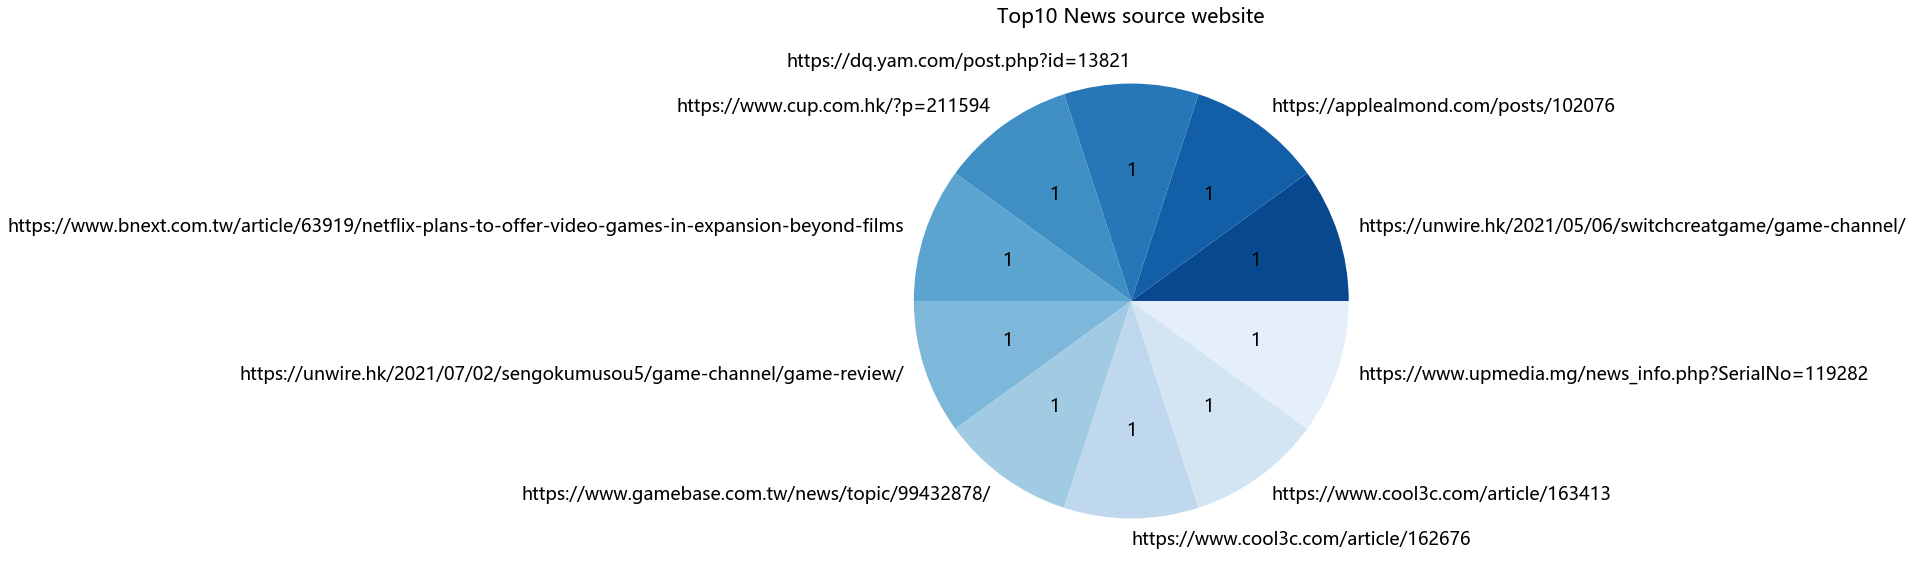

In [12]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        # 同時顯示數值和占比
        return '{v:d}'.format(v=val)
    return my_autopct

#開始畫圖
color = sns.color_palette("Blues_r",10)
plt.figure(figsize=(20, 10))
plt.pie(web[0:10]['num'], labels=web[0:10]['Link'], autopct=make_autopct(web[0:10]['num']),colors=color,textprops ={'fontsize':18})
#plt.legend(fontsize=12,loc=u'upper left')
plt.title(u'Top10 News source website',fontsize=20)
plt.show()